<a href="https://colab.research.google.com/github/harrysharma/Ted_talk_view_prediction/blob/main/Hari_TED_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
from sklearn.metrics import mean_squared_error,r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',500)
pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import ast
import calendar
%config InlineBackend.figure_format = 'retina'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filepath='/content/drive/MyDrive/AlmaBetter/Capston Project 3 Ted Talk Analysis/Code/Data/data_ted_talks.csv'

In [4]:
dataset=pd.read_csv(filepath)

In [5]:
dataset.shape

(4005, 19)

In [6]:
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [7]:
dataset.info()        #comments,about_speakers, occupations, all_speakers, has null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [8]:
df=dataset.copy()

In [9]:
df.describe([.75,.9])

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
90%,44241.800000,3.994610e+06,351.100000,1133.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [10]:
df.describe(include='object')

,title,speaker_1,all_speakers,occupations,about_speakers,recorded_date,published_date,event,native_lang,available_lang,topics,related_talks,url,description,transcript
count,4005,4005,4001,3483,3502,4004,4005,4005,4005,4005,4005,4005,4005,4005,4005
unique,4005,3274,3306,2049,2977,1334,2962,459,12,3902,3977,4005,4005,4005,4005
top,"Organic design, inspired by nature",Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,2017-04-24,2017-09-07,TED-Ed,en,['en'],"['TED-Ed', 'math']",{1386: 'Questions no one knows the answers to'...,https://www.ted.com/talks/ashton_cofer_a_plan_...,If you listen to visual artist Jess Thom speak...,I got my first computer when I was a teenager ...
freq,1,34,34,53,10,97,27,556,3957,24,8,1,1,1,1


In [11]:
df['published_date']=pd.to_datetime(df['published_date'],format='%Y-%m-%d')
df['recorded_date']=pd.to_datetime(df['recorded_date'],format='%Y-%m-%d')

In [12]:

df['month'] = pd.DatetimeIndex(df['published_date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['year'] = pd.DatetimeIndex(df['published_date']).year
df['day'] = pd.DatetimeIndex(df['published_date']).day

last_publishing_date = df['published_date'].max()
df['time_after_published']=last_publishing_date - pd.DatetimeIndex(df['published_date'])
df['days_to_publish']=df['published_date'] - df['recorded_date']
df['time_after_published'] = pd.to_numeric(df['time_after_published'].dt.days, downcast='integer')
df['days_to_publish'] = pd.to_numeric(df['days_to_publish'].dt.days, downcast='integer')

In [13]:
df['occupations'].fillna(str({0:['other']}),inplace=True,axis=0)

In [14]:
df['occupations']=df['occupations'].apply(lambda x:[val for val in ast.literal_eval(x).values() ])

In [15]:
df.drop(index=[3389],axis=0,inplace=True)   #data about speaker in japnese

# **Feature Engineering**


In [16]:
df.drop(['talk_id','speaker_1','all_speakers','url'],axis=1,inplace=True)

In [17]:
df.columns

Index(['title', 'occupations', 'about_speakers', 'views', 'recorded_date',
       'published_date', 'event', 'native_lang', 'available_lang', 'comments',
       'duration', 'topics', 'related_talks', 'description', 'transcript',
       'month', 'year', 'day', 'time_after_published', 'days_to_publish'],
      dtype='object')

In [18]:
df.head(2)

,title,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,month,year,day,time_after_published,days_to_publish
0,Averting the climate crisis,[[climate advocate]],{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Jun,2006,27,5056,122.0
1,The best stats you've ever seen,[[global health expert; data visionary]],"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Jun,2006,27,5056,125.0


In [19]:
df['related_talks'] = df['related_talks'].apply(lambda x: [val for val in ast.literal_eval(x).values()])

##Removing Punctuations

In [155]:
import re
!pip install word2number
from word2number import w2n


  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5580 sha256=273e5ee2a03ab9481c0934f8b59387256fd0f5895c49cfddf61f815cff4d8963
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [199]:

def remove_punctuation(text):
  '''a function for removing punctuation'''
  text=re.sub("[^a-zA-Z]"," ",text)
  for word in text.split():
    try:
      w2n.word_to_num(word)
    except:
      continue
  # replacing the punctuations with no space, 
  # which in effect deletes the punctuation marks 
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [191]:
df['related_talks'] = df['related_talks'].apply(remove_punctuation)
df.head(1)

KeyError: ignored

##Removing Stopwords

In [22]:
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [24]:
def remove_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [wordnet.lemmatize(word.lower()) for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [25]:
df['related_talks'] = df['related_talks'].apply(remove_stopwords)

In [26]:
df['related_talks'][0]

'new thinking climate crisis business logic sustainability state climate — might turn tide climate important thing fight climate change talk climate change happening here adapt'

In [229]:
filepath='/content/drive/MyDrive/AlmaBetter/Capstone3_ML_NLP_Regression/cleaned_data.csv'
clean_data=pd.read_csv(filepath)

In [194]:
clean_data.head()

,talk_id,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,days_taken_to_publish,time_since_published,daily_views,topics_string,text_corpus
0,1,3523392,977,2006-02-25,2006-06-27,TED2006,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,Nobel Laureate Al Gore focused the world’s att...,climate advocate,"Thank you so much, Chris. And it's truly a gre...",With the same humor and humanity he exuded in ...,122 days,5056 days,696.735614,alternative energy cars climate change culture...,alternative energy cars climate change cultur...
1,92,14501685,1190,2006-02-22,2006-06-27,TED2006,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,"In Hans Rosling’s hands, data sings. Global tr...",global health expert; data visionary,"About 10 years ago, I took on the task to teac...",You've never seen data presented like this. Wi...,125 days,5056 days,2867.645837,Africa Asia Google demo economics global issue...,Africa Asia Google demo economics global issu...
2,7,1920832,1286,2006-02-24,2006-06-27,TED2006,"['computers', 'entertainment', 'interface desi...",Simplicity sells,David Pogue is the personal technology columni...,technology columnist,"(Music: ""The Sound of Silence,"" Simon & Garfun...",New York Times columnist David Pogue takes aim...,123 days,5056 days,379.836267,computers entertainment interface design media...,computers entertainment interface design medi...
3,53,2664069,1116,2006-02-26,2006-06-27,TED2006,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,Majora Carter redefined the field of environme...,activist for environmental justice,If you're here today — and I'm very happy that...,"In an emotionally charged talk, MacArthur-winn...",121 days,5056 days,526.808187,MacArthur grant activism business cities envir...,MacArthur grant activism business cities envi...
4,66,65051954,1164,2006-02-25,2006-06-27,TED2006,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,Creativity expert Sir Ken Robinson challenges ...,author educator,Good morning. How are you? (Audience) Good. It...,Sir Ken Robinson makes an entertaining and pro...,122 days,5056 days,12863.744117,children creativity culture dance education pa...,children creativity culture dance education p...


In [195]:
df=clean_data.copy()

In [196]:
!pip install contractions
import contractions

In [197]:

def rem_punctuation(text):
  # creating an empty list
  expanded_words = []    
  for word in text.split():
    # using contractions.fix to expand the shotened words
    expanded_words.append(contractions.fix(word))   
      
  expanded_text = ' '.join(expanded_words)
  no_punct=expanded_text.translate(str.maketrans('', '', string.punctuation))

  return no_punct

In [ ]:
from sklearn.preprocessing 

In [200]:
df['text_corpus'] = df['text_corpus'].apply(remove_punctuation)
df.head(1)

,talk_id,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,days_taken_to_publish,time_since_published,daily_views,topics_string,text_corpus
0,1,3523392,977,2006-02-25,2006-06-27,TED2006,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,Nobel Laureate Al Gore focused the world’s att...,climate advocate,"Thank you so much, Chris. And it's truly a gre...",With the same humor and humanity he exuded in ...,122 days,5056 days,696.735614,alternative energy cars climate change culture...,alternative energy cars climate change cultur...


In [201]:
df['text_corpus'] = df['text_corpus'].apply(remove_stopwords)
df.head(1)

,talk_id,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,days_taken_to_publish,time_since_published,daily_views,topics_string,text_corpus
0,1,3523392,977,2006-02-25,2006-06-27,TED2006,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,Nobel Laureate Al Gore focused the world’s att...,climate advocate,"Thank you so much, Chris. And it's truly a gre...",With the same humor and humanity he exuded in ...,122 days,5056 days,696.735614,alternative energy cars climate change culture...,alternative energy car climate change culture ...


In [202]:
final_df=df[['duration', 'title','days_taken_to_publish','time_since_published','daily_views','text_corpus']]

In [203]:
x=final_df['text_corpus']
y=final_df['daily_views']

In [204]:
count_vectorizer=CountVectorizer('english',lowercase=True,min_df=100)

In [205]:
x_vector_c=count_vectorizer.fit_transform(x)
features= count_vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b365ae050>,
                    color=None,
                    features=['ability', 'able', 'absence', 'absolute',
                              'absolutely', 'abstract', 'abuse', 'academic',
                              'accept', 'accepted', 'access', 'accessible',
                              'accident', 'according', 'account', 'accurate',
                              'achieve', 'achieved', 'achievement', 'acid',
                              'acknowledge', 'across', 'act', 'acting',
                              'action', 'active', 'actively', 'activism',
                              'activist', 'activity', ...],
                    n=None, orient='v')

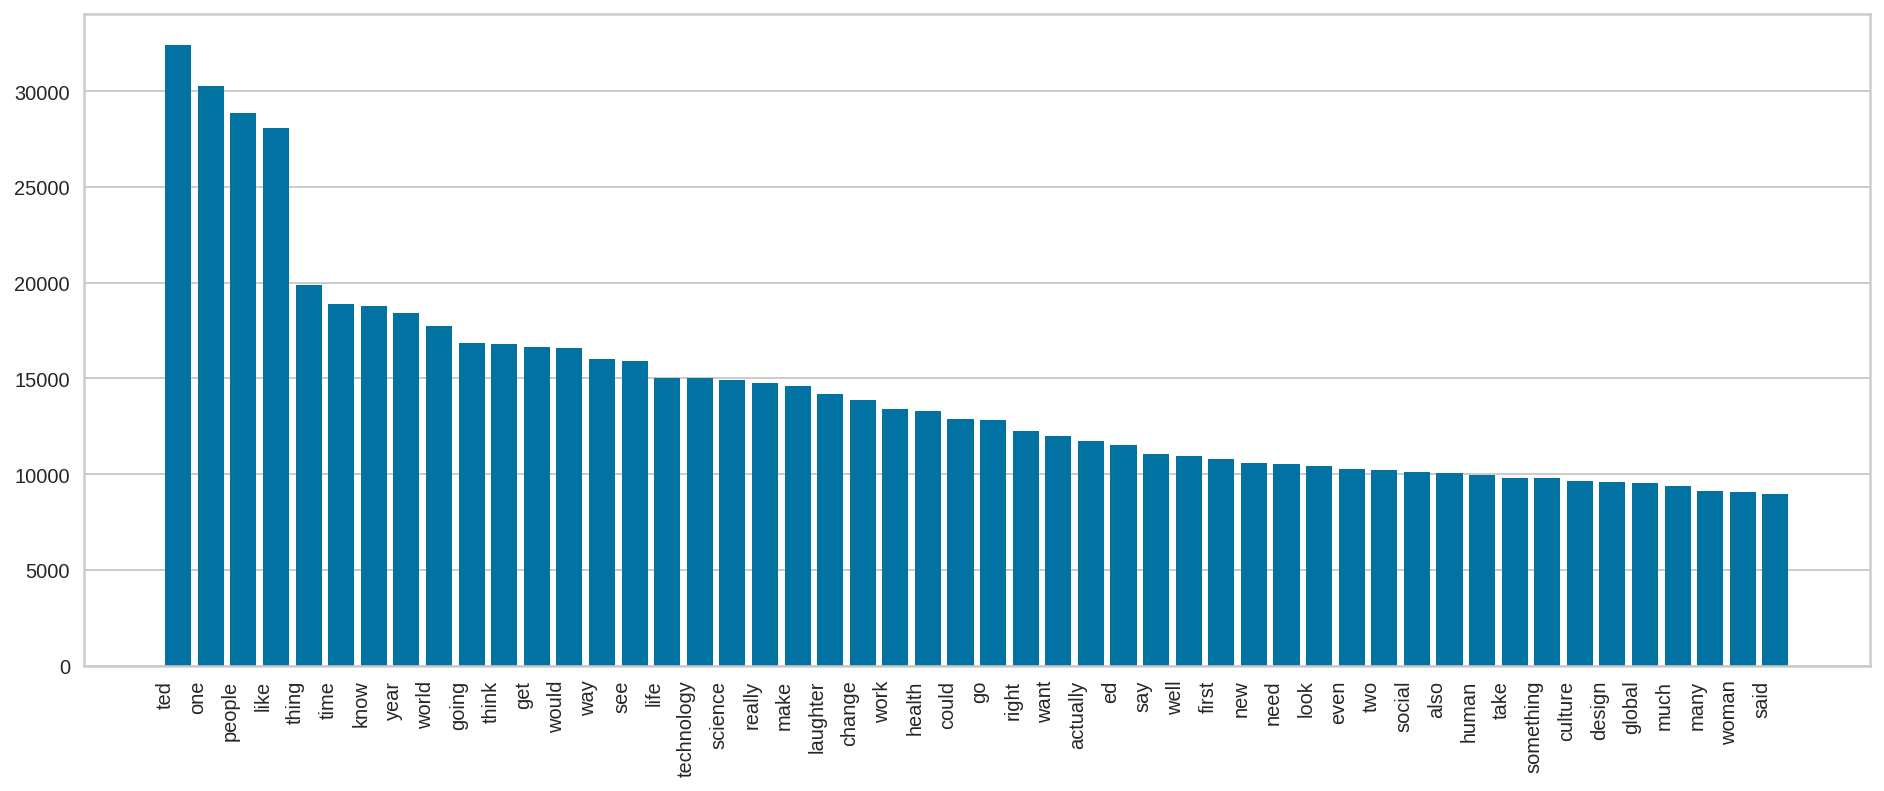

In [206]:
from yellowbrick.text import FreqDistVisualizer
plt.figure(figsize=(16,6))
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(x_vector_c)
visualizer

In [207]:
Tfidf_vectorizer=TfidfVectorizer('english',lowercase=True,min_df=100,max_features=1000,ngram_range=(1,3))

In [208]:
x_vector_t=Tfidf_vectorizer.fit_transform(x).toarray()
features= Tfidf_vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b1f166a10>,
                    color=None,
                    features=['ability', 'able', 'absolutely', 'access',
                              'across', 'act', 'action', 'activism', 'activist',
                              'activity', 'actually', 'add', 'adult',
                              'adventure', 'advocate', 'africa', 'african',
                              'age', 'aging', 'ago', 'agriculture', 'ai', 'aid',
                              'air', 'algorithm', 'allow', 'almost', 'alone',
                              'along', 'already', ...],
                    n=None, orient='v')

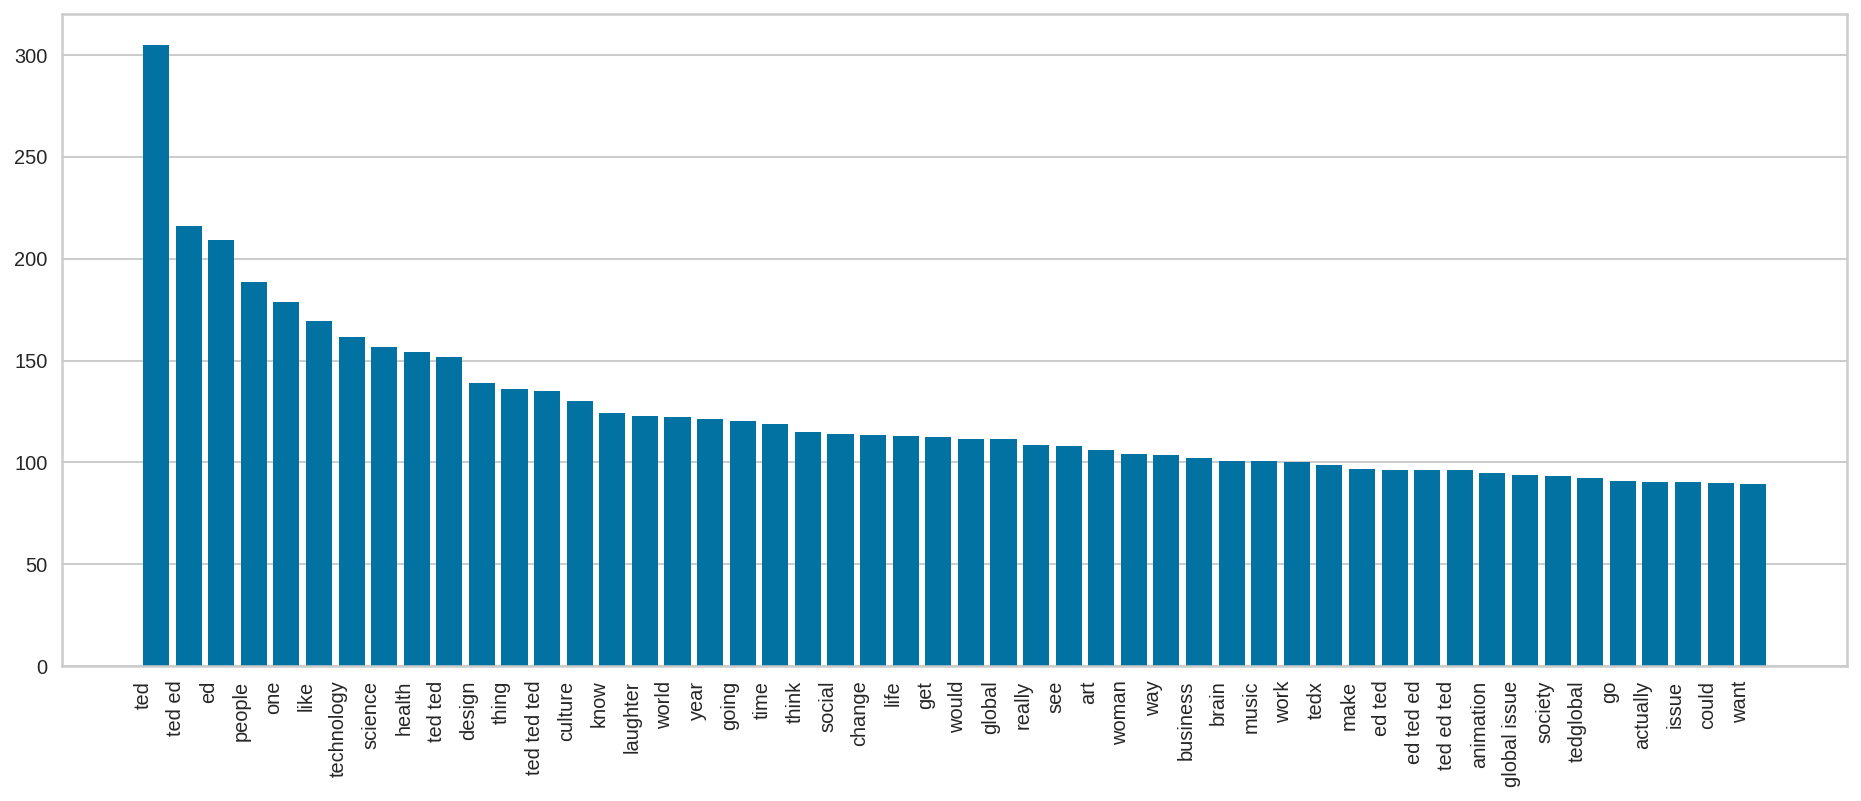

In [209]:
from yellowbrick.text import FreqDistVisualizer
plt.figure(figsize=(16,6))
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(x_vector_t)
visualizer

In [210]:
X_train, X_test, y_train, y_test = train_test_split(x_vector_t, y, test_size= 0.3, random_state=42)

In [211]:
from sklearn.linear_model import SGDRegressor


In [212]:
clf = SGDRegressor(learning_rate='constant', eta0=0.01, n_iter_no_change=9000)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=9000, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [213]:
y_pred = clf.predict(X_train)

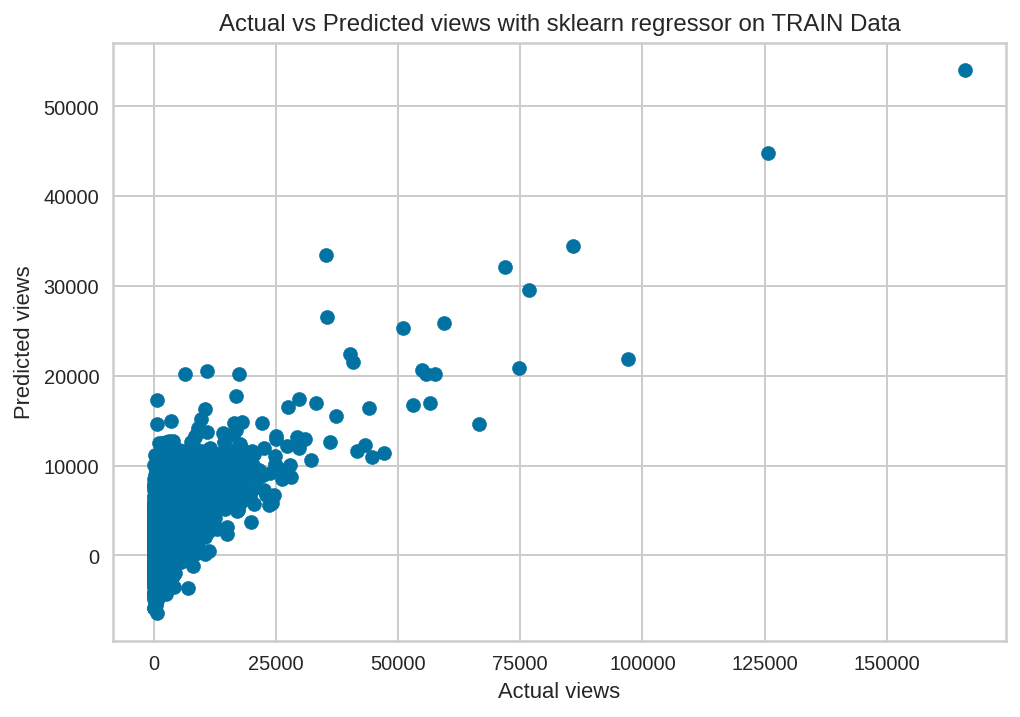

Mean Squared Error:  32872191.781520985


In [214]:
y_actual = y_train
y_pred = clf.predict(X_train)


plt.scatter(y_actual,y_pred)
plt.xlabel('Actual views')
plt.ylabel('Predicted views')
plt.title('Actual vs Predicted views with sklearn regressor on TRAIN Data')
plt.show()

loss3 = mean_squared_error(y_actual, y_pred)

print("Mean Squared Error: ",loss3)

In [215]:
r2=r2_score(y_actual,y_pred)
r2

0.43327777569457226

In [216]:
y_test_pred = clf.predict(X_test)

In [217]:
r2_score(y_test,y_test_pred)

-0.06910050909115006

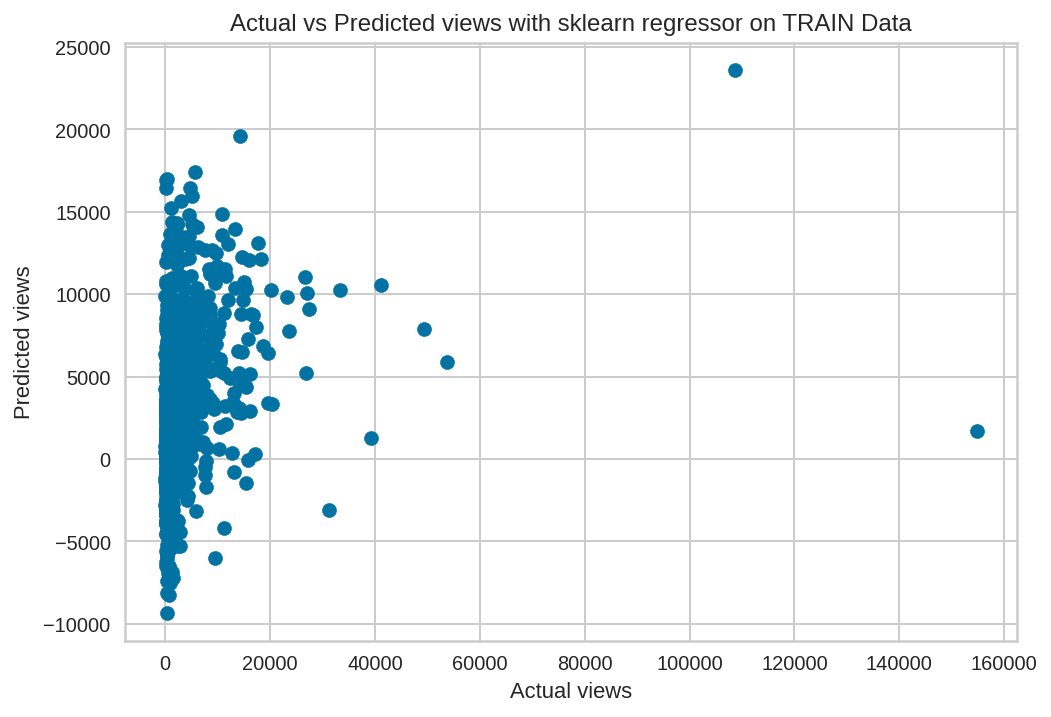

In [218]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual views')
plt.ylabel('Predicted views')
plt.title('Actual vs Predicted views with sklearn regressor on TRAIN Data')
plt.show()

In [219]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred=model.predict(X_test)

In [220]:
r2_score(y_train,y_train_pred)

0.25221153391537465

In [221]:
r2_score(y_test,y_test_pred)

0.08394528589487127

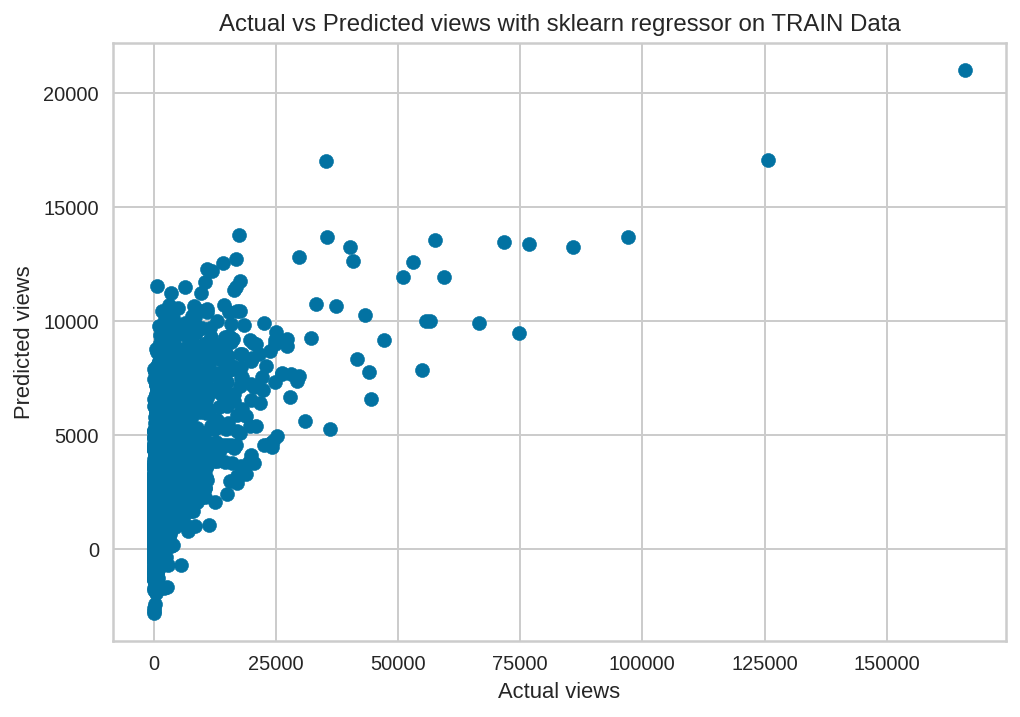

In [222]:
plt.scatter(y_train,y_train_pred)
plt.xlabel('Actual views')
plt.ylabel('Predicted views')
plt.title('Actual vs Predicted views with sklearn regressor on TRAIN Data')
plt.show()

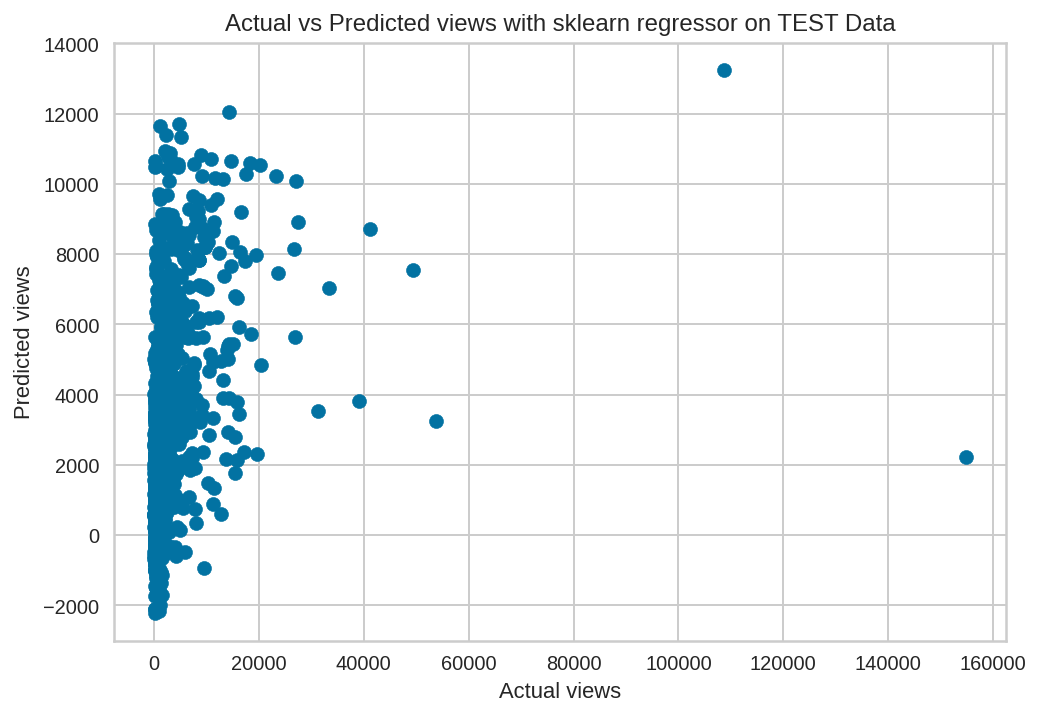

In [223]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual views')
plt.ylabel('Predicted views')
plt.title('Actual vs Predicted views with sklearn regressor on TEST Data')
plt.show()

In [224]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [225]:
regr = PassiveAggressiveRegressor()
regr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=None, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [226]:
pred_y_train=regr.predict(X_train)
pred_y_test=regr.predict(X_test)

In [227]:
r2_score(y_train,pred_y_train)

0.05642750155219933

In [228]:
r2_score(y_test,pred_y_test)

0.037486282594346054

In [230]:
df=dataset.copy()

In [232]:
df.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
